In [1]:
import os
import random
import torchaudio
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
wav_dir = "/gpfs/proj1/choe_lab/tanu/Species_classification/raw_audio/species_in_gryllus_genus/"
wav_file_list = sorted(os.listdir(wav_dir))

In [3]:
#create a dictionary to collect all the audio files per species name. 
#The length of this dictionary here should be 11 and there are total 11 dieffernt species here.

datafile = r'/gpfs/proj1/choe_lab/tanu/Species_classification/raw_data/raw_data.txt'
with open(datafile, 'r') as file:
  lines = [line.strip() for line in file.readlines()]
# print(lines)
print(len(lines))

species_dict = {}
for line in lines:
  text_after_G = line.split("G. ")[1]
  species = text_after_G.split(" ")[0]
  if species.find(".wav") != -1 or species.find(".WAV") != -1:
    species = species[:-4]

  if species in species_dict:
    species_dict[species].append(line)
  else:
    species_dict[species] = [line]

print(len(species_dict))
#print(species_dict)

592
11


In [4]:
#get the number of audio files for each species. we will later use this to plot the distribution
species_count = {}

for species,items in species_dict.items():
  species_count[species] = len(items)
print(species_count)

{'lineaticeps': 78, 'fultoni': 20, 'firmus': 68, 'integer': 52, 'leei': 33, 'lightfooti': 198, 'armatus': 83, 'brevicaudus': 7, 'assimilis': 33, 'chisosensis': 2, 'cohni': 18}


In [5]:
print(len(lines))

592


In [6]:
#collect the duratio for all the audio files
wavfile_list = {}
num_iter = 0
for wav_file in tqdm(lines):
  #print("iteration: ", num_iter +1)
  text_after_G = wav_file.split("G. ")[1]
  species = text_after_G.split(" ")[0]
  if species.find(".wav") != -1 or species.find(".WAV") != -1:
    species = species[:-4]
  wav, sample_rate = torchaudio.load(os.path.join(wav_dir, wav_file))
  duration = float(wav.shape[1]) / sample_rate
  wavfile_list[wav_file] = duration 
  #num_iter += 1


100%|█████████████████████████████████████████| 592/592 [00:44<00:00, 13.17it/s]


In [7]:
wavfile_list_sort = dict(sorted(wavfile_list.items(), key = lambda item: item[1]))
print(wavfile_list_sort)

{'R15-323, S15-105, 25.7c_G. lightfooti.WAV': 14.21641723356009, 'R07-046_204078_G. lightfooti.wav': 15.7556462585034, 'R15-267, S15-53, 25.1c_G. lightfooti.WAV': 16.07981859410431, 'R15-219, S15-54, 24.9c_G. lightfooti.WAV': 18.33795918367347, 'R96-51_211305_G. integer.wav': 19.463696145124718, 'R17-24, S17-6, 23.6c_G. leei.WAV': 20.143310657596373, 'R15-215 (part 1), S15-49, 25.7c_G. lightfooti.WAV': 20.892154195011337, 'R98-075_214261_G. lineaticeps.wav': 21.744489795918366, 'R15-215 (part 2), S15-49, 25.7c_G. lightfooti.WAV': 21.980589569160998, 'R15-386, S15-50, 25.4c_G. lightfooti.WAV': 22.726530612244897, 'R15-133 (2nd part), S15-74, 26.8c_G. lightfooti.WAV': 22.790385487528344, 'R01-053_208534_G. leei.wav': 24.14548752834467, 'R04-013_203764_G. lineaticeps.wav': 24.562244897959182, 'R07-056_204088.wav_G. firmus TX.wav': 26.082879818594105, 'R08-002_204182.wav_G. lineaticeps.wav': 26.12344671201814, 'R95-73_211206_G. cohni.wav': 26.993786848072563, 'R12-075_200019_G. lightfooti.

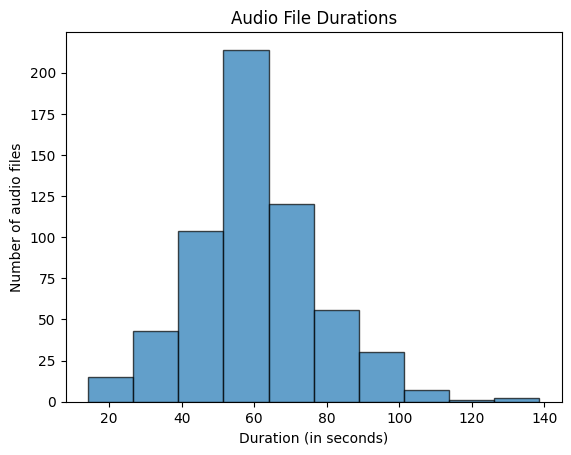

In [9]:
durations = list(wavfile_list.values())

#create histogram to show the distribution of the sudio files on duration of audio
plt.hist(durations, bins =10, edgecolor = 'black', alpha = 0.7)
plt.title("Audio File Durations")
plt.xlabel("Duration (in seconds)")
plt.ylabel("Number of audio files")
#plt.grid(True)
#plt.show()

dpi = 200
figurename = "species_duration_plot.png"
plt.savefig(figurename, dpi=dpi)


